# DATA SCIENCE IN MADRID

## HOW MUCH TIME A NEW DATA SCIENTIST HAVE TO WAIT TO FIND A DATA SCIENCE JOB?

### Preprocesing Data

In [1]:
import pandas as pd
import re
import numpy as np
from datetime import datetime

In [2]:
df_ed=pd.read_csv("perfil_educacion_new.txt",delimiter=";",na_values=["nope"],encoding="ANSI",on_bad_lines='warn',names=["#","n_perfil","Institucion","Titulo","titulo_especifico","Fechainicio","Fecha_fin","descripcion"])

In [3]:
df_ed.tail()

,#,n_perfil,Institucion,Titulo,titulo_especifico,Fechainicio,Fecha_fin,descripcion
4199,3,1558.0,Polytech Nancy - ex ESSTIN,Year Abroad,Industrial Engineering,2017,2018,"Nancy, France"
4200,4,1558.0,Universidad Carlos III de Madrid,Bachelor's degree,Industrial Engineering,2014,2018,Grado en Ingeniería en Tecnologías Industriale...
4201,0,1559.0,Universitat Oberta de Catalunya,NaN,Master en Bioinformática y Bioestadística,2018,2020,NaN
4202,1,1559.0,U-tad,NaN,Master de Experto en Data Science,2015,2016,NaN
4203,2,1559.0,Universidad Politécnica de Madrid,Ingeniero Superior de Telecomunicaciones,"Especialidad de Comunicaciones, intensificació...",2007,2014,NaN


In [4]:
df_ed.dropna(subset=["titulo_especifico"],axis=0,inplace=True)
df_ed["clase"]=df_ed["titulo_especifico"].apply(lambda x: 1 if "Data Science" in x else(1 if "Data Scientist" in x else (2 if "Dat" in x else 0) ))
perfiles_data=set(df_ed.groupby("n_perfil").filter(lambda x: x['clase'].sum()>0)['n_perfil'].values)
df_ed["perfil_data"]=0
for i in range(len(df_ed['n_perfil'])) :
    if df_ed['n_perfil'].iloc[i] in perfiles_data:
        df_ed["perfil_data"].iat[i]=1
df_ed.dropna(subset=["Fechainicio","Fecha_fin"],how='all',axis=0,inplace=True)
df_ed["Fecha_fin"].fillna(value=df_ed["Fechainicio"],inplace=True)
df_ed.drop(df_ed[df_ed.Institucion.isna()].index,axis=0, inplace=True)

In [5]:
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3515 entries, 0 to 4203
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  3515 non-null   object 
 1   n_perfil           3515 non-null   float64
 2   Institucion        3515 non-null   object 
 3   Titulo             2477 non-null   object 
 4   titulo_especifico  3515 non-null   object 
 5   Fechainicio        3515 non-null   object 
 6   Fecha_fin          3515 non-null   object 
 7   descripcion        1392 non-null   object 
 8   clase              3515 non-null   int64  
 9   perfil_data        3515 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 431.1+ KB


In [6]:
df_exp=pd.read_csv("perfil_experiencia_new.txt",delimiter=";",encoding='ANSI', on_bad_lines='warn',na_values=["nope"],names=["#","n_perfil","Cargo","Empresa","Fechas","descripcion","jornada"])
df=df_exp[["n_perfil"]]
df["clase"]=df_exp["Cargo"].apply(lambda x: 1 if "Data Science" in x else(1 if "Data Scientist" in x else (2 if "Data" in x else 0) ))
dic_meses={
    "abr":"04",
    "dic":"12",
    "nov":"11",
    "feb":"02",
    "ene":"01",
    "mar":"03",
    "oct":"10",
    "ago":"08",
    "may":"05",
    "jul":"07",
    "jun":"06",
    "sept":"09"
}
df["inicio"]="S"
for i in range(len(df_exp["Fechas"])):
    fech=df_exp["Fechas"].loc[i]
    fecha=str(fech).split(" – ")
    try:
        mes,año=str(fecha[0]).split(" ")
        mes=dic_meses[mes]
        #print(mes)
        df["inicio"].at[i]=pd.to_datetime(mes+" "+año, format='%m %Y')
    except:
        df["inicio"].at[i]=pd.to_datetime(fecha[0], format='%Y')

<ipython-input-6-cfe9df5fce4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clase"]=df_exp["Cargo"].apply(lambda x: 1 if "Data Science" in x else(1 if "Data Scientist" in x else (2 if "Data" in x else 0) ))
<ipython-input-6-cfe9df5fce4c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["inicio"]="S"
C:\Users\david\anaconda3\lib\site-packages\pandas\core\series.py:1169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

In [7]:
def separador_titulos(df_ed,colum):
    df3=pd.DataFrame(columns=["n_perfil","titulo","tema"])
    for i in range(len(df_ed)):
        if bool(re.match(r'M[aásS][sc][ t]',df_ed[colum].iloc[i])):
            #pass
            #print(df_ed.titulo_especifico.iloc[i])
            try:
                tema=re.search(r'(en |in |of |Master )(.*)',df_ed[colum].iloc[i]).group(2)
            except:
                tema="Otros"
            dic={
                "n_perfil":df_ed.n_perfil.iloc[i],
                "titulo":"Master",
                "tema":tema
            }
            df3=df3.append(dic,ignore_index=True)
            #print(re.search(r'(en|in|of) (.*)',df_ed.titulo_especifico.iloc[i]).group(2))
        elif bool(re.match(r'Ing|Eng',df_ed[colum].iloc[i])):
            #pass
    #         print(df_ed.titulo_especifico.iloc[i])
            try:
                tema=re.search(r'(en |de |Ingeniería |Ingeniero)(.*)',df_ed[colum].iloc[i]).group(2)
            except:
                tema="Otros"
            dic={
                "n_perfil":df_ed.n_perfil.iloc[i],
                "titulo":"Ingeniería",
                "tema":tema
            }
            df3=df3.append(dic,ignore_index=True)
        elif bool(re.match(r'Grad|Bach',df_ed[colum].iloc[i])):
            #pass
    #         print(df_ed.titulo_especifico.iloc[i])
            try:
                tema=re.search(r'(en |de |of |in | - )(.*)',df_ed[colum].iloc[i]).group(2)
            except:
                tema="Otros"
            dic={
                "n_perfil":df_ed.n_perfil.iloc[i],
                "titulo":"Grado",
                "tema":tema
            }
            df3=df3.append(dic,ignore_index=True)
        elif bool(re.match(r'Doc|Phd',df_ed[colum].iloc[i])):
            #pass
            #print(df_ed.titulo_especifico.iloc[i])
            try:
                tema=re.search(r'(en |de |of |in )(.*)',df_ed[colum].iloc[i]).group(2)
            except:
                tema="Otros"
            dic={
                "n_perfil":df_ed.n_perfil.iloc[i],
                "titulo":"Doctorado",
                "tema":tema
            }
            df3=df3.append(dic,ignore_index=True)
        elif bool(re.match(r'Téc',df_ed[colum].iloc[i])):
            #pass
            #print(df_ed.titulo_especifico.iloc[i])
            try:
                tema=re.search(r'(en |de |of |in )(.*)',df_ed[colum].iloc[i]).group(2)
            except:
                tema="Otros"
            dic={
                "n_perfil":df_ed.n_perfil.iloc[i],
                "titulo":"Técnico",
                "tema":tema
            }
            df3=df3.append(dic,ignore_index=True)
        elif bool(re.match(r'\d',df_ed[colum].iloc[i])):
            pass
            #print(df_ed.iloc[i])
            linea_numerica=pd.DataFrame(df_ed.iloc[i])
            try:
                df2=separador_titulos(linea_numerica.T,"Titulo")
                df3=pd.concat([df3,df2],ignore_index=True)
            except:
                pass
        elif bool(re.match(r'Boot',df_ed[colum].iloc[i])):
            #pass
            #print(df_ed.titulo_especifico.iloc[i])
            try:
                tema=re.search(r'(en |de |of |in |Bootcamp )(.*)',df_ed[colum].iloc[i]).group(2)
            except:
                tema="Otros"
            dic={
                "n_perfil":df_ed.n_perfil.iloc[i],
                "titulo":"Bootcamp",
                "tema":tema
            }
            df3=df3.append(dic,ignore_index=True)
        else:
            #pass
            #print(">",df_ed[colum].iloc[i])
            #print(df_ed.Titulo.iloc[i])
            try:
                if bool(re.match(r'M[aásS][sc][ t]',df_ed.Titulo.iloc[i])):
                    titulo="Master"
                elif bool(re.match(r'Ing|Eng',df_ed.Titulo.iloc[i])):
                    titulo="Ingeniería"
                elif bool(re.match(r'Grad|Bach',df_ed.Titulo.iloc[i])):
                    titulo="Grado"
                elif bool(re.match(r'Doc|Phd',df_ed.Titulo.iloc[i])):
                    titulo="Doctorado"
                elif bool(re.match(r'Téc',df_ed.Titulo.iloc[i])):
                    titulo="Técnico"
                elif bool(re.match(r'Boot',df_ed.Titulo.iloc[i])):
                    titulo="Bootcamp"
            except:
                titulo="Otros"
            dic={
                "n_perfil":df_ed.n_perfil.iloc[i],
                "titulo":titulo,
                "tema":df_ed[colum].iloc[i]
            }
            df3=df3.append(dic,ignore_index=True)
    return df3

In [8]:
df_titulo=separador_titulos(df_ed,"titulo_especifico")

### Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Instituciones

In [10]:
top_inst=df_ed.groupby('Institucion').filter(lambda x: len(x) > 15)['Institucion']

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


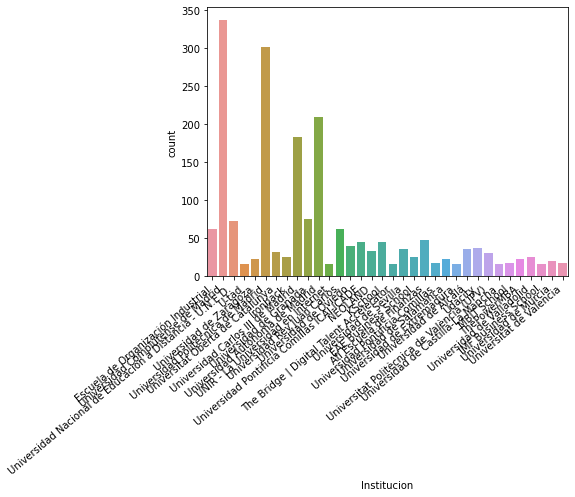

In [11]:
plt.figure(figsize=(8,7))
ax = sns.countplot(top_inst)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_instituciones.png')
plt.show()

#### Estudio

In [12]:
top_titu_esp=df_titulo.groupby('tema').filter(lambda x: len(x) > 15)['tema']

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


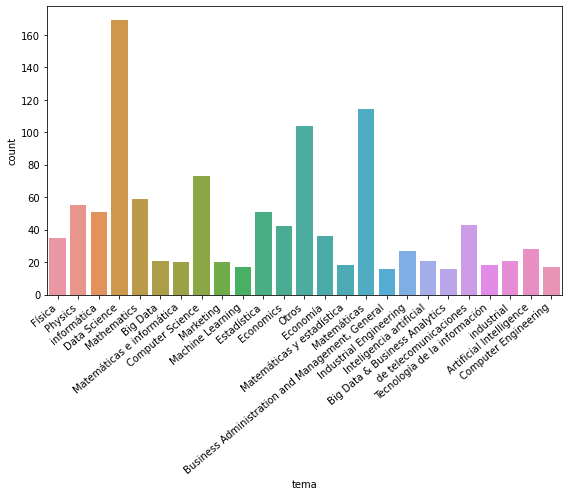

In [13]:
plt.figure(figsize=(8,7))
ax = sns.countplot(top_titu_esp)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_estudios.png')
plt.show()

In [14]:
top_titu=df_titulo.groupby('titulo').filter(lambda x: len(x) > 1)['titulo']

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


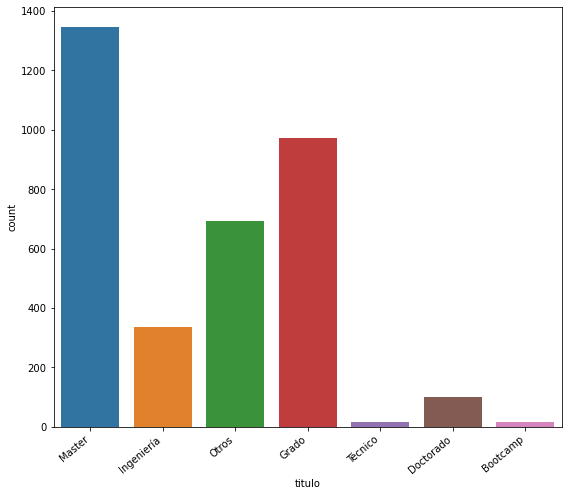

In [15]:
plt.figure(figsize=(8,7))
ax = sns.countplot(top_titu)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_degrees.png')
plt.show()

## Cantidad de títulos por persona 

In [16]:
cant_est_persona =df_titulo.groupby('n_perfil').count()

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


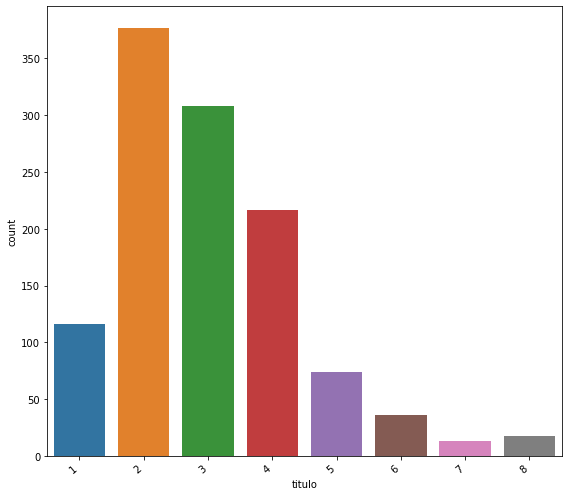

In [17]:
plt.figure(figsize=(8,7))
ax = sns.countplot(cant_est_persona["titulo"])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_titulos.png')
plt.show()

## Cantidad de títulos relacionados con Data

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


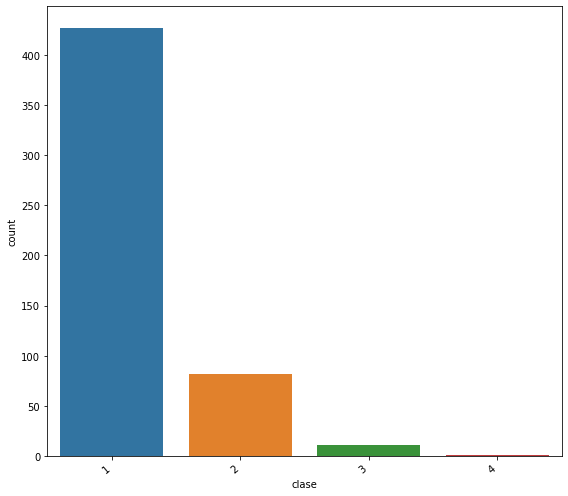

In [18]:
plt.figure(figsize=(8,7))
ax = sns.countplot(df_ed[df_ed['clase']>0].groupby("n_perfil")['clase'].count())

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_titulosdata.png')
plt.show()

## Cantidad de títulos por persona no relacionados con Data

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


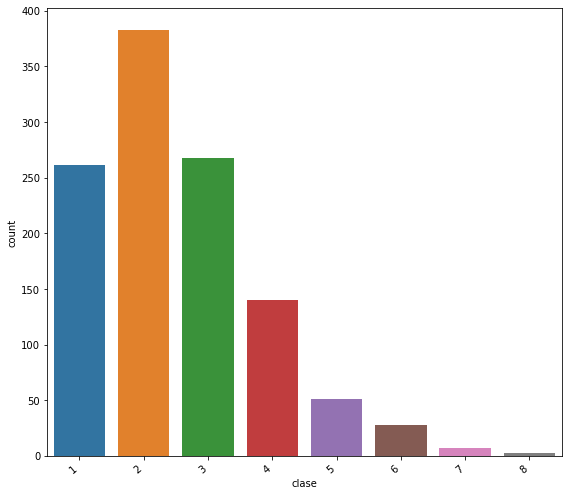

In [19]:
plt.figure(figsize=(8,7))
ax = sns.countplot(df_ed[df_ed['clase']==0].groupby("n_perfil")['clase'].count())

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_titulos_cant.png')
plt.show()

## Cantidad de títulos por tipo

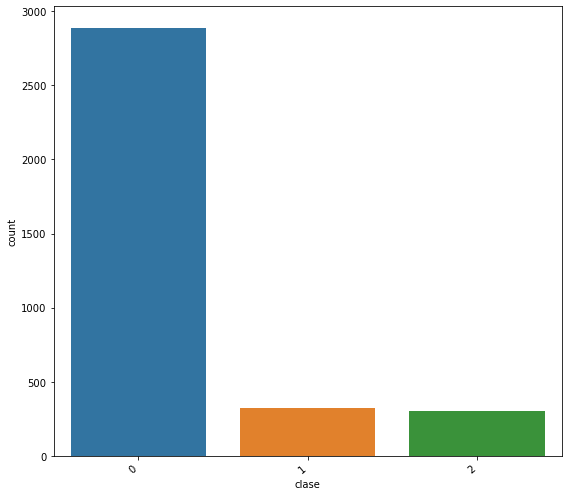

In [20]:

plt.figure(figsize=(8,7))
ax = sns.countplot(x="clase", data=df_ed)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_tit_clase.png')
plt.show()

### Creating Working Data Frame

In [21]:
df_tra=pd.DataFrame()

In [22]:
df_tra["n_perfil"]=list(df_ed["n_perfil"].unique())

In [23]:
df_tra["perfil_data"]=0
for ip in range(len(df_tra["n_perfil"])):
    df_tra["perfil_data"].iat[ip]=df_ed[df_ed["n_perfil"]==df_tra["n_perfil"].iloc[ip]]["perfil_data"].max()

In [24]:
cantidad_titulos=df_ed.groupby("n_perfil")['clase'].count()
df_tra["cantidad_titulos"]=0
for ip in range(len(df_tra["n_perfil"])):
    df_tra["cantidad_titulos"].iat[ip]=cantidad_titulos.loc[df_tra["n_perfil"].iloc[ip]]

In [25]:
cantidad_titulos_data=df_ed[df_ed['clase']>0].groupby("n_perfil")['clase'].count()
df_tra["cantidad_titulos_data"]=0
for ip in range(len(df_tra["n_perfil"])):
    try:
        df_tra["cantidad_titulos_data"].iat[ip]=cantidad_titulos_data.loc[df_tra["n_perfil"].iloc[ip]]
    except:
        df_tra["cantidad_titulos_data"].iat[ip]=0

In [26]:
g_titulos=df_titulo.groupby("n_perfil")["titulo"]
df_tra["Grado"]=0
df_tra["Posgrado"]=0
df_tra["Bootcamp"]=0
df_tra["Masters"]=0
df_tra["Ingenieria"]=0
for g in g_titulos:
    gi,gt=g
    ni=df_tra[df_tra["n_perfil"]==gi].index[0]
    if 'Bootcamp' in list(gt):
        df_tra["Bootcamp"].iat[ni]=1
    if "Grado" in list(gt):
        df_tra["Grado"].iat[ni]=1
    if "Ingeniería" in list(gt):
        df_tra["Ingenieria"].iat[ni]=1
    if "Master" or "Doctorado" in list(gt):
        df_tra["Posgrado"].iat[ni]=1
    if  "Master" in list(gt):
        nm=list(gt).count("Master")
        df_tra["Masters"].iat[ni]=nm
    

In [27]:
g_temas=df_titulo.groupby("n_perfil")["tema"]
df_tra["Técnicos"]=0
df_tra["Matemáticas"]=0
df_tra["Humanidades"]=0
df_tra["Economia"]=0
df_tra["Marketing"]=0
df_tra["Naturales"]=0
df_tra["temas"]="Otro"
for g in g_temas:
    gi,gt=g
    ni=df_tra[df_tra["n_perfil"]==gi].index[0]
    if re.search(r'Antro|Psi|Fil|Soci|fil|antr|Phil|Dere|Abo',str(g[1])):
        df_tra["Humanidades"].iat[ni]=1
        df_tra["temas"].iat[ni]="Humanidades"
    if re.search(r'fís|phy|Fís|Phy|Astr|Ingen|Eng|Civ|ingen|mecá|Topo|Infor|infor|Full|Elec|Comp|full|elec|comp|Geof|geof|Quí|quí|chem|Chem|Ener|Indus',str(g[1])):
        df_tra["Técnicos"].iat[ni]=1
        df_tra["temas"].iat[ni]="Técnicos"
    if re.search(r'Econ|econ|admin|Busin|BA|Conta|Admin|Finan',str(g[1])):
        df_tra["Economia"].iat[ni]=1
        df_tra["temas"].iat[ni]="Economia"
    if re.search(r'Mark|Publi',str(g[1])):
        df_tra["Marketing"].iat[ni]=1
        df_tra["temas"].iat[ni]="Marketing"
    if re.search(r'Mat|esta|Estad|mat|Statis',str(g[1])):
        df_tra["Matemáticas"].iat[ni]=1
        df_tra["temas"].iat[ni]="Matemáticas"
    if re.search(r'Bio|bio|Nat|nat|Marin',str(g[1])):
        df_tra["Naturales"].iat[ni]=1
        df_tra["temas"].iat[ni]="Naturales"

In [28]:
fin_primer_estudio=df_ed[df_ed['clase']>0].groupby("n_perfil")['Fecha_fin'].min()
df_tra["fin_1_estu"]=0
for ip in range(len(df_tra["n_perfil"])):
    try:
        df_tra["fin_1_estu"].iat[ip]=fin_primer_estudio.loc[df_tra["n_perfil"].iloc[ip]]
    except:
        pass

In [29]:
inicio_primer_trabajo=df[df['clase']>0].groupby("n_perfil")['inicio'].min()
df_tra["inicio_trabajo"]=0
for ip in range(len(df_tra["n_perfil"])):
    try:
        df_tra["inicio_trabajo"].iat[ip]=inicio_primer_trabajo.loc[df_tra["n_perfil"].iloc[ip]]
    except:
        pass

In [30]:
df_tra["calculo_dias"]=0
df_tra["tiempo_busqueda"]="igual"
for p in range(len(df_tra)):
    try:
        ini=df_tra["inicio_trabajo"].iloc[p]
        if ini == 0:
            ini=datetime.now()
        fin=datetime.strptime(str(df_tra["fin_1_estu"].iloc[p]), "%Y")
    except:
        ini=0
        fin=0
    try:
        df_tra["calculo_dias"].iat[p]=(fin-ini).days
    except:
        df_tra["calculo_dias"].iat[p]=int(fin-ini)
    try:
        dias=int((fin-ini).days)
    except:
        dias=int(fin-ini)
    if dias<0: 
        df_tra["tiempo_busqueda"].iat[p]="buscó"
    elif dias>0:
        df_tra["tiempo_busqueda"].iat[p]="previo"

In [31]:
df_tra[df_tra["perfil_data"]==1].describe()

,n_perfil,perfil_data,cantidad_titulos,cantidad_titulos_data,Grado,Posgrado,Bootcamp,Masters,Ingenieria,Técnicos,Matemáticas,Humanidades,Economia,Marketing,Naturales,calculo_dias
count,522.000000,522.0,522.000000,522.000000,522.000000,522.0,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,840.446360,1.0,3.463602,1.203065,0.590038,1.0,0.019157,1.411877,0.191571,0.524904,0.321839,0.040230,0.354406,0.044061,0.067050,-84.840996
std,450.574108,0.0,1.504828,0.468745,0.492298,0.0,0.137208,1.091273,0.393915,0.499858,0.467630,0.196686,0.478792,0.205428,0.250348,732.933089
min,0.000000,1.0,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5125.000000
25%,411.250000,1.0,2.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-365.000000
50%,876.500000,1.0,3.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-120.000000
75%,1235.250000,1.0,4.000000,1.000000,1.000000,1.0,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,214.000000
max,1559.000000,1.0,8.000000,4.000000,1.000000,1.0,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4352.000000


In [32]:
df_tra[(df_tra["perfil_data"]==1)&(df_tra["calculo_dias"]<0)]["calculo_dias"].mean()

-459.49526813880124

In [33]:
cant_perfiles_data=df_tra.groupby(["perfil_data"])["n_perfil"]

In [34]:
cant_perfiles_data.size()

perfil_data
0    637
1    522
Name: n_perfil, dtype: int64

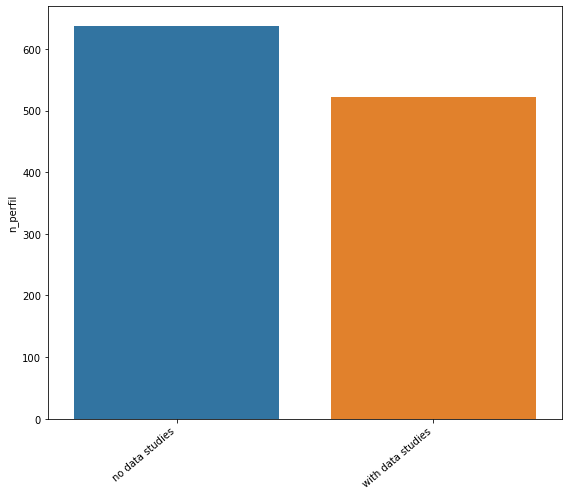

In [35]:
plt.figure(figsize=(8,7))
ax = sns.barplot(x=["no data studies", "with data studies"], y=cant_perfiles_data.size())

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_data_studies.png')
plt.show()

In [36]:
df_tra.columns

Index(['n_perfil', 'perfil_data', 'cantidad_titulos', 'cantidad_titulos_data',
       'Grado', 'Posgrado', 'Bootcamp', 'Masters', 'Ingenieria', 'Técnicos',
       'Matemáticas', 'Humanidades', 'Economia', 'Marketing', 'Naturales',
       'temas', 'fin_1_estu', 'inicio_trabajo', 'calculo_dias',
       'tiempo_busqueda'],
      dtype='object')

In [37]:
print(len(df_tra[(df_tra["temas"]=="Otro")&(df_tra["perfil_data"]==1)&(df_tra["cantidad_titulos"]!=df_tra["cantidad_titulos_data"])]))
df_tra[(df_tra["temas"]=="Otro")&(df_tra["perfil_data"]==1)&(df_tra["cantidad_titulos"]!=df_tra["cantidad_titulos_data"])]
df_tra.tail()

23


,n_perfil,perfil_data,cantidad_titulos,cantidad_titulos_data,Grado,Posgrado,Bootcamp,Masters,Ingenieria,Técnicos,Matemáticas,Humanidades,Economia,Marketing,Naturales,temas,fin_1_estu,inicio_trabajo,calculo_dias,tiempo_busqueda
1154,1555.0,1,4,1,1,1,0,0,0,0,0,0,1,1,0,Marketing,2019,2019-05-01 00:00:00,-120,buscó
1155,1556.0,1,2,1,0,1,0,0,0,0,1,0,0,0,0,Matemáticas,2016,2017-05-01 00:00:00,-486,buscó
1156,1557.0,1,3,1,1,1,0,0,0,1,1,0,0,0,0,Matemáticas,2021,2018-12-01 00:00:00,762,previo
1157,1558.0,0,5,0,1,1,0,4,0,1,0,0,0,0,0,Técnicos,0,2020-12-01 00:00:00,0,igual
1158,1559.0,1,3,1,0,1,0,2,1,1,1,0,0,0,1,Naturales,2016,2014-04-01 00:00:00,640,previo


## Analyzing the relations

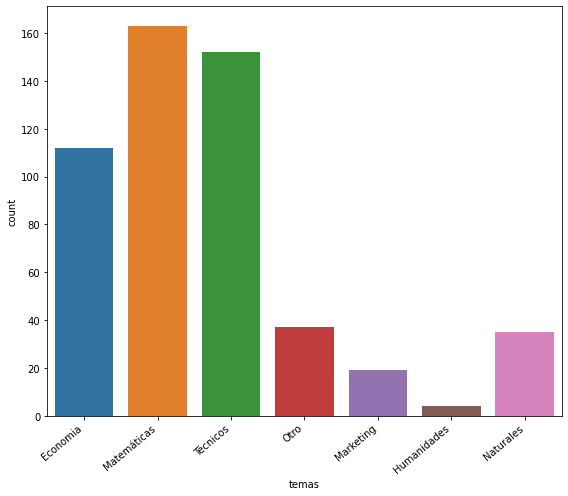

In [38]:
plt.figure(figsize=(8,7))
ax=sns.countplot(x='temas',data=df_tra[df_tra["perfil_data"]==1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_temas.png')
plt.show()

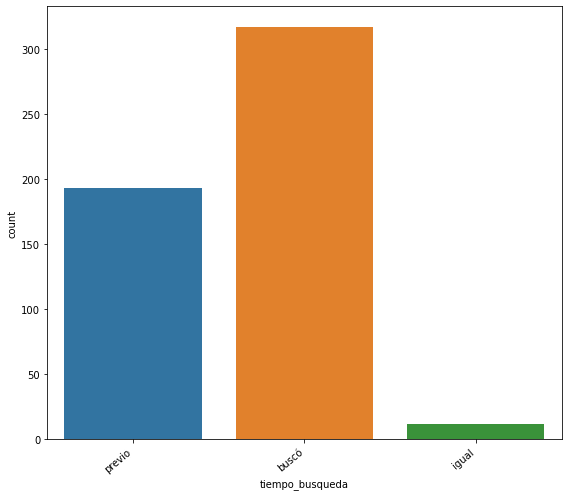

In [39]:
plt.figure(figsize=(8,7))
ax=sns.countplot(x='tiempo_busqueda',data=df_tra[df_tra["perfil_data"]==1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_search_time.png')
plt.show()

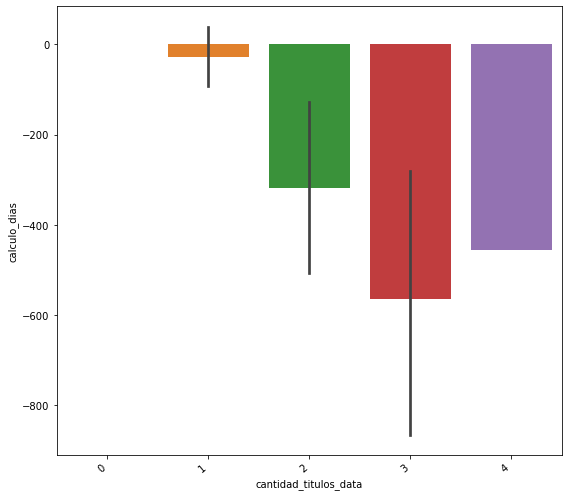

In [40]:
plt.figure(figsize=(8,7))
ax=sns.barplot(x='cantidad_titulos_data',y="calculo_dias",data=df_tra)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_titulosdata_dias.png')
plt.show()

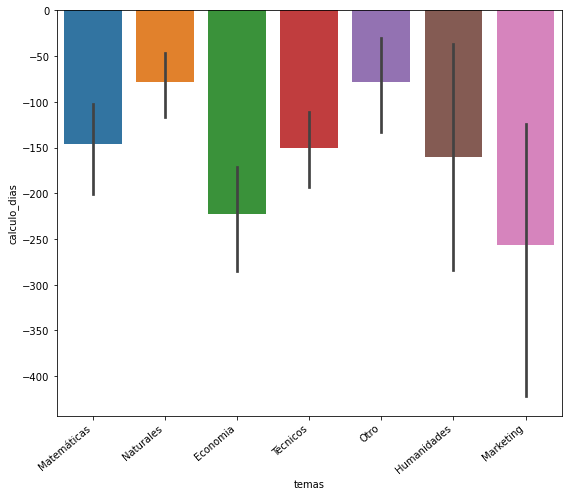

In [41]:
plt.figure(figsize=(8,7))
ax=sns.barplot(x='temas',y="calculo_dias",data=df_tra[df_tra["calculo_dias"]<=0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_temas_dias.png')
plt.show()

In [42]:
# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# pd.set_option('display.max_colwidth', -1)  # or 199
#pd.reset_option('all')

<AxesSubplot:>

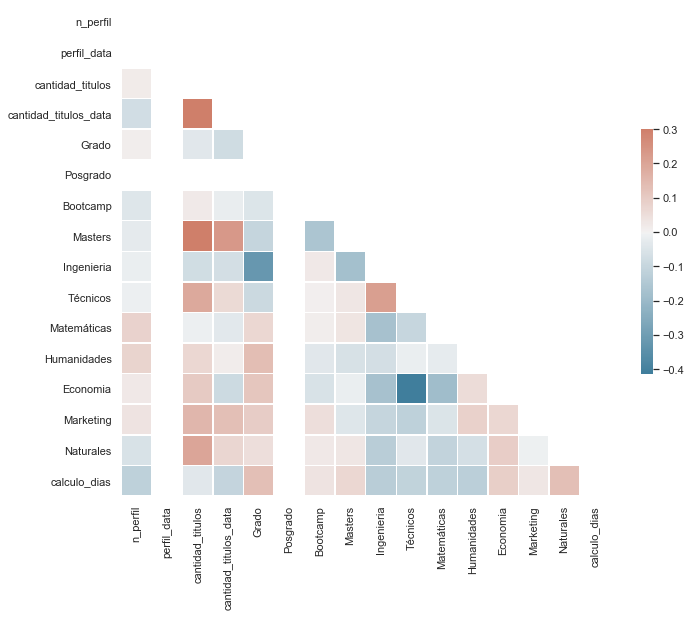

In [43]:
corr=df_tra[(df_tra["perfil_data"]==1)&(df_tra["calculo_dias"]<0)].corr()
#sns.heatmap()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
# corr=df_tra[(df_tra["calculo_dias"]<500)&(df_tra["calculo_dias"]>-500)]
# sns.pairplot(corr)

<AxesSubplot:xlabel='Masters', ylabel='calculo_dias'>

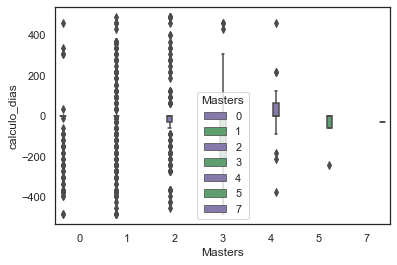

In [45]:
sns.boxplot(x="Masters", y="calculo_dias",
            hue="Masters", palette=["m", "g"],
            data=df_tra[(df_tra["calculo_dias"]<500)&(df_tra["calculo_dias"]>-500)])

### Dropping Outliers

In [46]:
df_tra_so=df_tra[(df_tra["calculo_dias"]<0)&(df_tra["calculo_dias"]>-900)]
len(df_tra_so)

275

### Binning

['-2.33', '-1.56', '-0.8']
3


<ipython-input-47-cb71ca4fb31b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tra_so['cd-binned'] =  pd.cut(df_tra_so['calculo_dias'], bins, labels=categorias, include_lowest=True )
C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cd-binned', ylabel='count'>

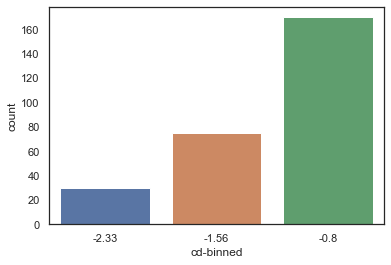

In [47]:
bins = np.linspace(min(df_tra_so["calculo_dias"]), max(df_tra_so["calculo_dias"]), 4)
categorias=[]
for b in bins[:-1]:
    categorias.append(str(round(b/365, 2)))
print(categorias)
print(len(categorias))
df_tra_so['cd-binned'] =  pd.cut(df_tra_so['calculo_dias'], bins, labels=categorias, include_lowest=True )
sns.countplot(df_tra_so["cd-binned"])
# plt.bar(categorias, df_tra_so["cd-binned"].value_counts())
# plt.xlabel("age")
# plt.ylabel("count")
# plt.title("age bins")
# plt.show()

In [48]:
df_tra_so[df_tra_so['Bootcamp']==1]['cd-binned'].value_counts()

-1.56    5
-0.8     3
-2.33    1
Name: cd-binned, dtype: int64

# Testing Models

In [49]:
# from sklearn.preprocessing import MinMaxScaler
# X=df_tra_so.drop(['cd-binned','calculo_dias','fin_1_estu','inicio_trabajo'], axis=1)
# y=df_tra_so.calculo_dias
# scaler_X = MinMaxScaler()
# scaler_X.fit(X)
# X = scaler_X.transform(X)

In [50]:
# from sklearn.decomposition import PCA

# pca = PCA()
# X_train_pca = pca.fit_transform(X)
# pca.explained_variance_ratio_

# plt.figure(figsize=(8,6))
# plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum())
# plt.ylabel('Varianza explicada')   # puedo definir un corte en la cantidad de Z que quiero de acuerdo a la cantidad acumulada de varianza explicada.
# plt.xlabel('PCA Index')  # lo ideal es quedarse con una varianza acumulada del 60% (en este caso las tres primeras barras explcian el 60% de la varianza explicada)
# plt.show()

In [51]:
# pca = PCA(n_components=12)
# X_train_pca = pca.fit_transform(X)

In [52]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
# X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y, test_size=0.30)

In [54]:
# regresion_lineal = linear_model.LinearRegression()
# regresion_lineal.fit(X_train, y_train)

In [55]:
# yhat = regresion_lineal.predict(X_test)

# for i,j in zip(yhat,y_test):
#     print("Predicción: ",i, "Valor real: ",j)
#     break

In [56]:
# mean_squared_error(yhat,y_test)

In [57]:
# r2_sin_ajustar = regresion_lineal.score(X_test, y_test) 
# r2_ajustada = 1 - (1-regresion_lineal.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# r2_sin_ajustar, r2_ajustada

In [58]:
from sklearn.preprocessing import MinMaxScaler
X=df_tra_so.drop(['cd-binned','calculo_dias','fin_1_estu','inicio_trabajo','temas','tiempo_busqueda'], axis=1)
y=df_tra_so['cd-binned']
scaler_X = MinMaxScaler()
scaler_X.fit(X)
X = scaler_X.transform(X)

In [59]:
# from sklearn.decomposition import PCA

# pca = PCA()
# X_train_pca = pca.fit_transform(X)
# pca.explained_variance_ratio_

# plt.figure(figsize=(8,6))
# plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum())
# plt.ylabel('Varianza explicada')   # puedo definir un corte en la cantidad de Z que quiero de acuerdo a la cantidad acumulada de varianza explicada.
# plt.xlabel('PCA Index')  # lo ideal es quedarse con una varianza acumulada del 60% (en este caso las tres primeras barras explcian el 60% de la varianza explicada)
# plt.show()

In [60]:
# pca = PCA(n_components=7)
# X_train_pca = pca.fit_transform(X)

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,yhat))

Accuracy:  0.16363636363636364


Exactitud:  0.16363636363636364
Precisión:  0.32051282051282054
Sensibilidad:  0.32941176470588235
F1-score:  0.15139701104613384
[[ 3 10 21]
 [ 1  1 13]
 [ 0  1  5]]


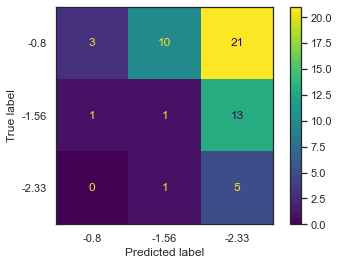

In [64]:

print("Exactitud: " , accuracy_score(y_test,yhat))
print("Precisión: ", precision_score(y_test,yhat, average="macro"))
print("Sensibilidad: ", recall_score(y_test,yhat, average="macro"))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))
cm = confusion_matrix(y_test,yhat)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [65]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

Exactitud:  0.4909090909090909
Precisión:  0.37222222222222223
Sensibilidad:  0.3934640522875817
F1-score:  0.3763128800442233
[[22  7  5]
 [ 9  3  3]
 [ 2  2  2]]


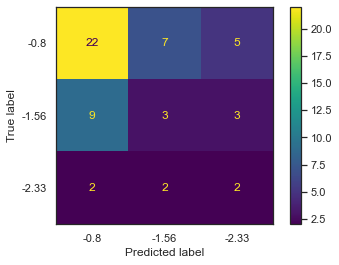

In [66]:
print("Exactitud: " , accuracy_score(y_test,yhat))
print("Precisión: ", precision_score(y_test,yhat, average="macro"))
print("Sensibilidad: ", recall_score(y_test,yhat, average="macro"))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))
cm = confusion_matrix(y_test,yhat)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

Exactitud:  0.6909090909090909
Precisión:  0.6645299145299145
Sensibilidad:  0.5843137254901961
F1-score:  0.6129883307965499
[[29  5  0]
 [ 8  6  1]
 [ 2  1  3]]


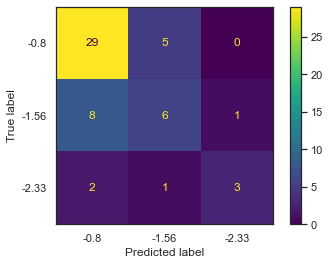

In [78]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy_score(y_test,yhat)
print("Exactitud: " , accuracy_score(y_test,yhat))
print("Precisión: ", precision_score(y_test,yhat, average="macro"))
print("Sensibilidad: ", recall_score(y_test,yhat, average="macro"))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))
cm = confusion_matrix(y_test,yhat)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.savefig(f'C:\\Users\\david\\Documents\\eddie_portfolio\\hugo-resume\\static\\img\\gra_cm_randomforest.png')


In [68]:
clf.predict_proba(X_test)

array([[0.92, 0.08, 0.  ],
       [0.51, 0.23, 0.26],
       [0.69, 0.23, 0.08],
       [0.81, 0.04, 0.15],
       [0.96, 0.04, 0.  ],
       [0.73, 0.1 , 0.17],
       [0.63, 0.23, 0.14],
       [0.62, 0.31, 0.07],
       [0.39, 0.34, 0.27],
       [0.86, 0.14, 0.  ],
       [0.36, 0.01, 0.63],
       [0.84, 0.16, 0.  ],
       [0.53, 0.41, 0.06],
       [0.94, 0.04, 0.02],
       [0.3 , 0.7 , 0.  ],
       [0.9 , 0.07, 0.03],
       [0.62, 0.13, 0.25],
       [0.65, 0.35, 0.  ],
       [0.75, 0.21, 0.04],
       [0.27, 0.44, 0.29],
       [0.9 , 0.07, 0.03],
       [0.64, 0.2 , 0.16],
       [0.36, 0.64, 0.  ],
       [0.81, 0.18, 0.01],
       [0.99, 0.01, 0.  ],
       [0.87, 0.13, 0.  ],
       [0.42, 0.1 , 0.48],
       [0.28, 0.48, 0.24],
       [0.7 , 0.29, 0.01],
       [0.35, 0.62, 0.03],
       [0.35, 0.52, 0.13],
       [0.78, 0.19, 0.03],
       [0.43, 0.54, 0.03],
       [0.66, 0.11, 0.23],
       [0.44, 0.35, 0.21],
       [0.24, 0.38, 0.38],
       [0.55, 0.39, 0.06],
 

In [69]:
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [70]:
params={'n_estimators': [100,200,300],
        'criterion':['gini','entropy'],
        'max_depth': [3,4,5,6,7,8],# Maxima pofundidad del arbol
        'max_features': [2, 3], # numero de features a considerar en cada split
        'max_leaf_nodes': [8], # maximo de nodos del arbol
        'min_impurity_decrease' : [0.02,0.3], # un nuevo nodo se hará si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [2,5] # The minimum number of samples required to split an internal node
        }

In [71]:
# GRid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer,recall_score

scorers = {"f1_macro","accuracy","recall_macro"}
clf = RandomForestClassifier()
grid_solver = GridSearchCV(estimator = clf, 
                   param_grid = params, 
                   scoring=scorers,
                   cv = 5,
                   refit="accuracy",
                   n_jobs=-1)

model_result = grid_solver.fit(X_train,y_train)

print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())
print(model_result.best_score_)
print(model_result.best_params_)
model_result.best_estimator_

0.3333161865569273
0.2546605559281615
0.6181502525252527
0.6181818181818183
{'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.02, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(max_depth=3, max_features=2, max_leaf_nodes=8,
                       min_impurity_decrease=0.02)

In [72]:
clf = model_result.best_estimator_
clf = clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy_score(y_test,yhat)

0.6181818181818182

Exactitud:  0.6181818181818182
Precisión:  0.20606060606060606
Sensibilidad:  0.3333333333333333
F1-score:  0.2546816479400749
[[34  0  0]
 [15  0  0]
 [ 6  0  0]]


C:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


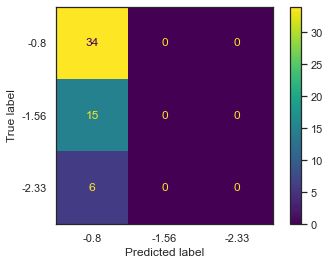

In [73]:

print("Exactitud: " , accuracy_score(y_test,yhat))
print("Precisión: ", precision_score(y_test,yhat, average="macro"))
print("Sensibilidad: ", recall_score(y_test,yhat, average="macro"))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))
cm = confusion_matrix(y_test,yhat)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [74]:
from sklearn.neighbors import KNeighborsClassifier
clasificador = KNeighborsClassifier(100, algorithm="brute")
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)

Exactitud:  0.6181818181818182
Precisión:  0.20606060606060606
Sensibilidad:  0.3333333333333333
F1-score:  0.2546816479400749
[[34  0  0]
 [15  0  0]
 [ 6  0  0]]


C:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


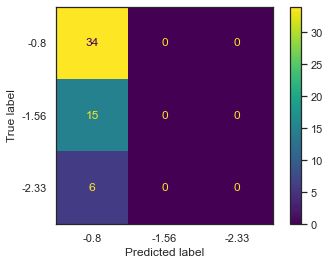

In [75]:
print("Exactitud: " , accuracy_score(y_test,yhat))
print("Precisión: ", precision_score(y_test,yhat, average="macro"))
print("Sensibilidad: ", recall_score(y_test,yhat, average="macro"))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))
cm = confusion_matrix(y_test,yhat)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()